**Setup**

In [36]:
import os
import zipfile
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [37]:
model = VGG16(weights='imagenet', include_top=False)

**Function to load and preprocess images**

In [42]:
def load_and_preprocess_image(url):
    img = image.load_img(url, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

**Load the Data**

In [39]:
with zipfile.ZipFile('/content/archive (25).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data/dataset')

In [40]:
url = '/content/data/dataset/photos_no_class'

**Load and preprocess all images**

In [45]:
images = []
for img_name in os.listdir(url):
    img_path = os.path.join(url, img_name)
    img_array = load_and_preprocess_image(img_path)
    images.append(img_array)

images = np.vstack(images)

**Extract features**

In [46]:
features = model.predict(images)
features = features.reshape((features.shape[0], -1))

3/3 [==============================] - 67s 22s/step


**Apply K-Means Clustering**

In [47]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
clusters = kmeans.predict(features)

**Function to display images from each cluster**

In [49]:
def display_cluster(cluster_idx):
    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(np.where(clusters == cluster_idx)[0][:9]):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image.array_to_img(images[idx]))
        plt.axis('off')
    plt.show()

**Display images**

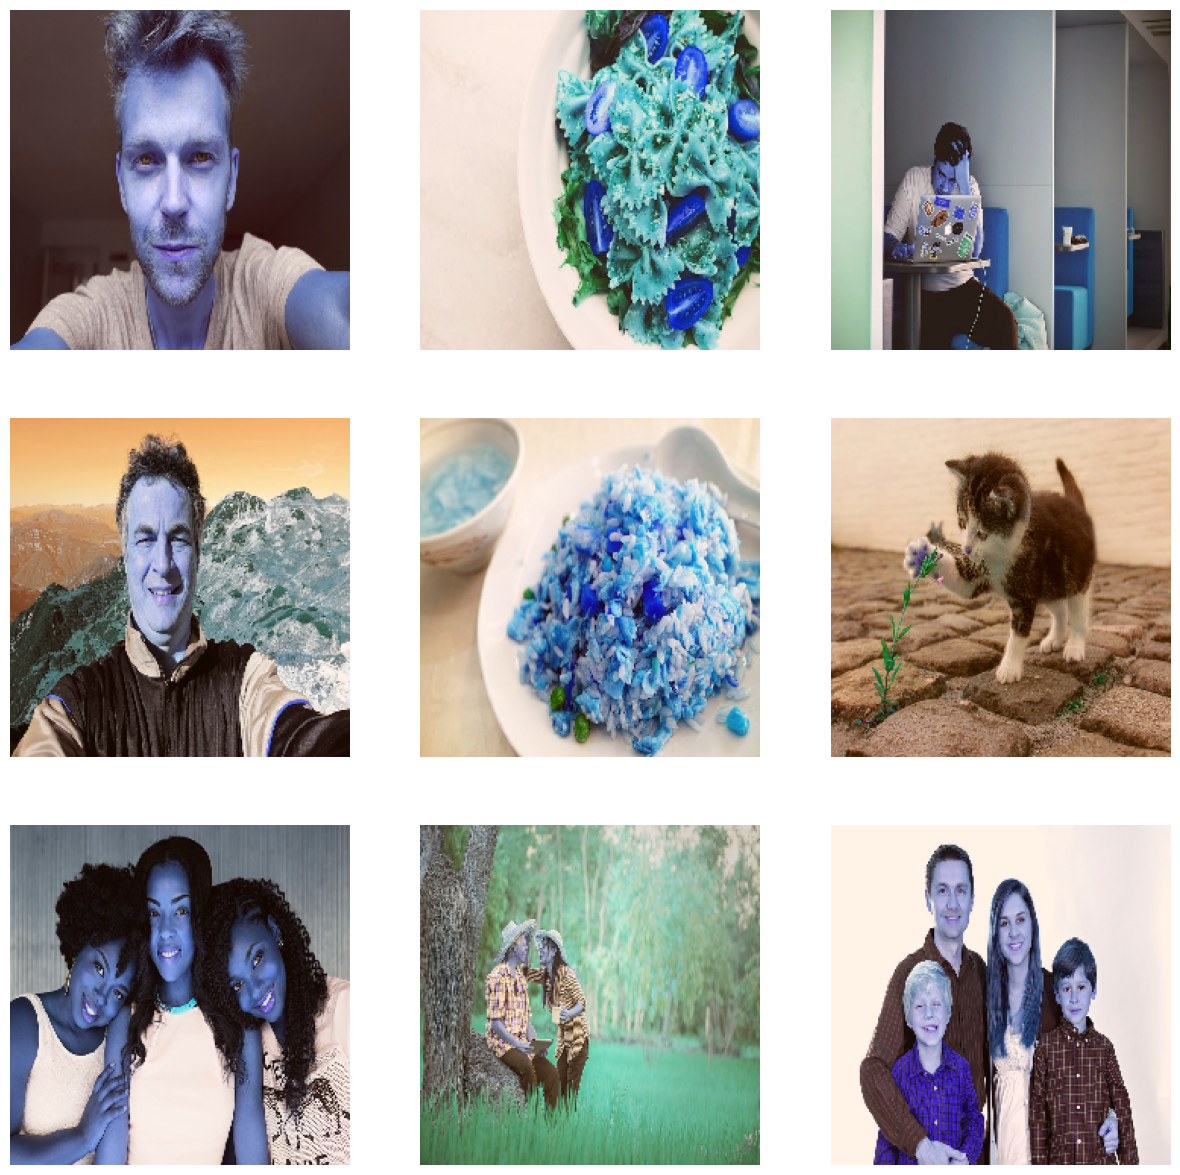

In [50]:
display_cluster(0)